In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [19]:
df = pd.read_csv('structured_project_analysis.csv')

In [20]:
df.head()

,Foundation,Project ID,Project Name,Category,Description,Homepage URL,PMC,Podling,Start Date,Status
0,Apache,hivemind,Apache HiveMind,Unknown,Unknown,http://hivemind.apache.org/,Unknown,False,Unknown,Unknown
1,Apache,shale,Apache Shale,Unknown,Unknown,http://shale.apache.org/,Unknown,False,Unknown,Unknown
2,Apache,beehive,Apache Beehive,Unknown,Unknown,http://beehive.apache.org/,Unknown,False,Unknown,Unknown
3,Apache,ibatis,Apache iBatis,Unknown,Unknown,http://ibatis.apache.org/,Unknown,False,Unknown,Unknown
4,Apache,excalibur,Apache Excalibur,Unknown,Unknown,http://excalibur.apache.org/,Unknown,False,Unknown,Unknown


## Structural Integrity & Data Types Audit

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Foundation    102 non-null    object
 1   Project ID    102 non-null    object
 2   Project Name  102 non-null    object
 3   Category      102 non-null    object
 4   Description   102 non-null    object
 5   Homepage URL  102 non-null    object
 6   PMC           102 non-null    object
 7   Podling       102 non-null    bool  
 8   Start Date    102 non-null    object
 9   Status        102 non-null    object
dtypes: bool(1), object(9)
memory usage: 7.4+ KB


## Statistical Summary of Metadata Metrics

In [37]:
df.describe(include='all')

,Foundation,Project ID,Project Name,Category,Description,Homepage URL,PMC,Podling,Start Date,Status,no_unknown_values
count,102,102,102,102,102,102,102,102,102,102,102.000000
unique,2,102,102,1,21,102,1,1,1,2,NaN
top,Apache,hivemind,Apache HiveMind,Unknown,Unknown,http://hivemind.apache.org/,Unknown,False,Unknown,Unknown,NaN
freq,82,1,1,102,82,1,102,102,102,82,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.607843
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.797978
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


## Technical Null Value Detection (NaN Analysis)

In [39]:
missing_values = df.isnull().sum()
print(missing_values)

Foundation           0
Project ID           0
Project Name         0
Category             0
Description          0
Homepage URL         0
PMC                  0
Podling              0
Start Date           0
Status               0
no_unknown_values    0
dtype: int64


## Project Distribution—Dataset Volume by Foundation

<Axes: xlabel='Foundation', ylabel='count'>

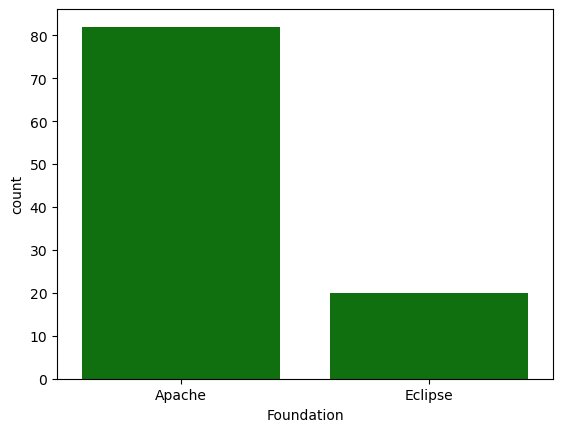

In [24]:
sns.countplot(x="Foundation", data=df, color="g")

## Checking number unknown values in each row

In [25]:
columns_to_check = [
    "Foundation", 
    "Project ID", 
    "Project Name", 
    "Category", 
    "Description", 
    "Homepage URL", 
    "PMC", 
    "Podling", 
    "Start Date", 
    "Status"
]


df["no_unknown_values"] = (df[columns_to_check] == "Unknown").sum(axis=1)
df.head()

,Foundation,Project ID,Project Name,Category,Description,Homepage URL,PMC,Podling,Start Date,Status,no_unknown_values
0,Apache,hivemind,Apache HiveMind,Unknown,Unknown,http://hivemind.apache.org/,Unknown,False,Unknown,Unknown,5
1,Apache,shale,Apache Shale,Unknown,Unknown,http://shale.apache.org/,Unknown,False,Unknown,Unknown,5
2,Apache,beehive,Apache Beehive,Unknown,Unknown,http://beehive.apache.org/,Unknown,False,Unknown,Unknown,5
3,Apache,ibatis,Apache iBatis,Unknown,Unknown,http://ibatis.apache.org/,Unknown,False,Unknown,Unknown,5
4,Apache,excalibur,Apache Excalibur,Unknown,Unknown,http://excalibur.apache.org/,Unknown,False,Unknown,Unknown,5


## Plot between number of unknown values and foundation

<Axes: xlabel='no_unknown_values', ylabel='Foundation'>

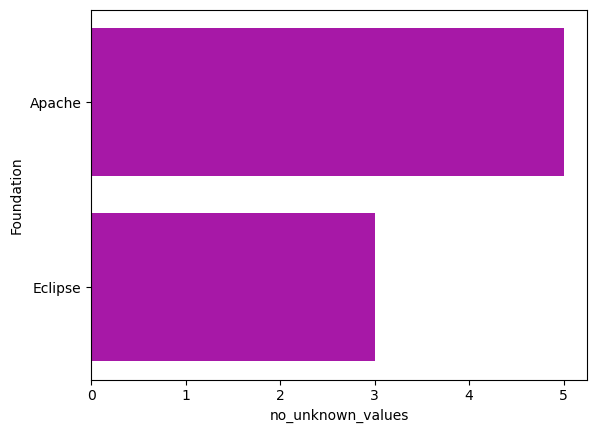

In [42]:
sns.barplot(x="no_unknown_values", y="Foundation", data=df, color="m")

## Number of project that contains Apache

In [27]:
data = df["Project Name"].str.contains("Apache", case=False).value_counts()
print(data)

Project Name
True     82
False    20
Name: count, dtype: int64


## Number of top performing project

In [29]:
top_performing_project = df[df["no_unknown_values"]== 0]
if top_performing_project.empty:
    print("No projects are 100% complete. Every project has at least one 'Unknown' field!")
else:
    print("Top Performing Projects (0 Unknowns):")
    print(top_performing_project[["Project Name", "Foundation"]])

No projects are 100% complete. Every project has at least one 'Unknown' field!


## Best projects (fewest unknowns) and Worst projects (most unknowns)

In [30]:
# Best projects (fewest unknowns)
print("Best Projects")
print(df.sort_values("no_unknown_values").head(5)[["Project Name", "no_unknown_values"]])

# Worst projects (most unknowns)
print("\nProjects Needing Work")
print(df.sort_values("no_unknown_values", ascending=False).head(5)[["Project Name", "no_unknown_values"]])

Best Projects
                           Project Name  no_unknown_values
101                     Eclipse Autowrx                  3
82                    Eclipse Adoptium®                  3
83                       Eclipse AQAvit                  3
84   Eclipse Migration Toolkit for Java                  3
85           Eclipse Adoptium Incubator                  3

Projects Needing Work
        Project Name  no_unknown_values
0    Apache HiveMind                  5
62     Apache Buildr                  5
60      Apache River                  5
59  Apache Chemistry                  5
58   Apache Usergrid                  5


## Classifying security types

In [14]:
df['Homepage URL(String)']=df["Homepage URL"].astype("string")
df['Security_Type'] = np.where(df['Homepage URL'].str.contains('https', case=False), 'Secure', 'Insecure')
df.head()

,Foundation,Project ID,Project Name,Category,Description,Homepage URL,PMC,Podling,Start Date,Status,no_unknown_values,Homepage URL(String),Security_Type
0,Apache,hivemind,Apache HiveMind,Unknown,Unknown,http://hivemind.apache.org/,Unknown,False,Unknown,Unknown,5,http://hivemind.apache.org/,Insecure
1,Apache,shale,Apache Shale,Unknown,Unknown,http://shale.apache.org/,Unknown,False,Unknown,Unknown,5,http://shale.apache.org/,Insecure
2,Apache,beehive,Apache Beehive,Unknown,Unknown,http://beehive.apache.org/,Unknown,False,Unknown,Unknown,5,http://beehive.apache.org/,Insecure
3,Apache,ibatis,Apache iBatis,Unknown,Unknown,http://ibatis.apache.org/,Unknown,False,Unknown,Unknown,5,http://ibatis.apache.org/,Insecure
4,Apache,excalibur,Apache Excalibur,Unknown,Unknown,http://excalibur.apache.org/,Unknown,False,Unknown,Unknown,5,http://excalibur.apache.org/,Insecure


## Plot for Security Type

<Axes: xlabel='Security_Type', ylabel='count'>

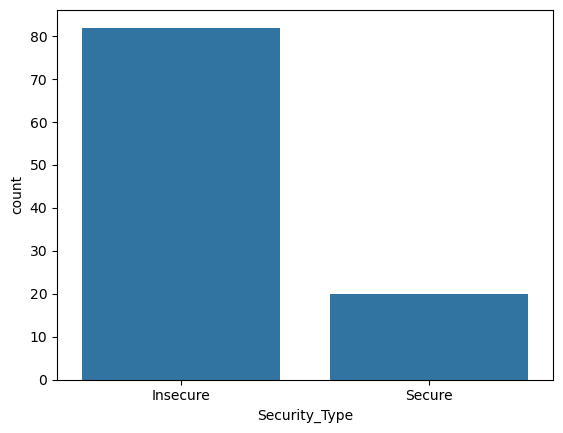

In [15]:
sns.countplot(x = df['Security_Type'], data=df)

## Number of duplicates

In [16]:
df['Homepage URL'].duplicated().sum()

np.int64(0)

## Number of descriptions that contains "<"

In [17]:
df['Description'].str.contains('<').sum()

np.int64(20)